# Uncovering Trends Among the Sale of Old and New Ford Vehicles

## Introduction:

This notebook consists of my portion of the group final project of my Stats 21 course. The project involved picking a dataset of over 10,000 rows, with each group member performing an analysis of their choice in order to uncover new trends in the data. This particular dataset was sourced from [Kaggle](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction), and it desrcibes the sale prices of new and used Ford vehicles available in the European market, along with other basic information about the vehicle (mileage, fuel economy, fuel type, etc). I chose to focus on the durability and longevity of the vehicles in the dataset. Specifically, I wanted to answer the question: what attributes do the highest-mileage cars in the dataset have in common, and how can we use this information to predict the longevity of future cars?

## Import the Data:

We first look at importing our data and examining its structure.

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ford.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


At a first glance, the data seems rather clean. To make the data is usable, we need to determine the number of NA values, if any.

In [5]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

We find that there are actually no NA values in our data. The data is ready to use apart from one small error: on the Kaggle summary page, the year of the cars' manufacture ranged from 1996 to 2060. Although we can reasonably assume that this was a typo, and that the actual manufacture year was probably 2006 instead of 2060, let's choose to filter out all cars newer than 2020.

In [6]:
df = df[ df["year"] <= 2020]

## Analysis

We want to determine the common similarities between cars that have the highest mileage, that is, the cars that were durable enough to withstand a significant amount of use. More specifically, we want to explore the relationship between features such as fuel type, engine size, and transmission type and the vehicle's total mileage.


Let's sort the dataframe by greatest to least mileage. Let's also drop the "tax" column as it is not important to our analysis.

In [7]:
df_sorted = df.sort_values(by = ['mileage'], ascending = False)
df_sorted.drop(['tax'], axis = 1, inplace = True)
df_sorted.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17103,Focus,2003,495,Manual,177644,Petrol,41.5,1.6
16946,Galaxy,2008,3995,Manual,174000,Diesel,44.8,1.8
16939,Mondeo,2012,3495,Manual,151000,Diesel,65.7,1.6
16250,Mondeo,2015,5795,Manual,150890,Diesel,65.7,2.0
17742,S-MAX,2007,2400,Manual,144000,Diesel,44.1,2.0


Let's now take a look at how the mileage of the cars in the dataset is distributed.

In [8]:
df_sorted.mileage.describe()

count     17965.000000
mean      23360.858447
std       19471.182902
min           1.000000
25%        9987.000000
50%       18242.000000
75%       31048.000000
max      177644.000000
Name: mileage, dtype: float64

array([[<AxesSubplot:title={'center':'mileage'}>]], dtype=object)

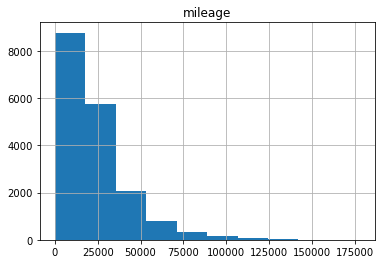

In [9]:
df_sorted.hist(column = ['mileage'])

Let's now look at the cars that we consider to be "high-mileage". In this case, we define a high-mileage car in this dataset to be one that is 3 standard deviations or more away from the mean. This is about 81,500 miles.

In [10]:
x = df[df['mileage'] >= 81500]
x

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
288,Fiesta,2014,4699,Manual,85000,Petrol,30,54.3,1.2
491,Focus,2016,7000,Manual,82616,Diesel,0,74.3,1.5
1343,Tourneo Connect,2015,9998,Manual,88927,Diesel,30,64.2,1.5
2108,Focus,2017,6995,Semi-Auto,87659,Diesel,150,67.3,1.5
2962,Kuga,2013,8995,Manual,97364,Diesel,200,47.9,2.0
...,...,...,...,...,...,...,...,...,...
17754,Focus,2006,1495,Manual,105000,Diesel,125,58.9,1.6
17756,C-MAX,2014,4895,Manual,110000,Diesel,125,55.4,2.0
17759,Fiesta,2012,4195,Manual,91598,Petrol,125,48.7,1.4
17760,C-MAX,2007,2695,Manual,82000,Petrol,235,39.8,1.8


Let's now focus on transmission type, and see what the prevalent type is for this high-mileage subset.

In [16]:
print(x.transmission.value_counts())
print(round(303 / 331, 4))

Manual       303
Automatic     25
Semi-Auto      3
Name: transmission, dtype: int64
0.9154


We see that over 91.5% of the cars in this subset are manual transmission vehicles. Let's compare this to the total percentage of manual vehicles in the complete dataset.

In [17]:
print(df.transmission.value_counts())
print(round((15518) /  (15518 + 1361 + 1087), 3))

Manual       15518
Automatic     1360
Semi-Auto     1087
Name: transmission, dtype: int64
0.864


Although the vast majority of the high-mileage cars are manuals (91.5%), so are the cars in the entire dataset (86.4%), so this feature does not necessarily contribute to longevity and durability.

Let's take a look at fuel type now. As a preliminary hypothesis, let's claim that diesel-powered vehicles are more durable and last a greater number of miles than gasoline engines. This is reasonable, since diesel engines must be able to withstand much higher compression forces due to the nature of diesel combustion, and thus must be more robustly built than gasoline engines.

In [19]:
print(df.fuelType.value_counts())
print(round(5762 / (12179 + 5762 + 22 + 2 + 1), 3))

Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64
0.321


Diesel engines account for about 32% of the total dataset.

In [20]:
print(x.fuelType.value_counts())
print(205 / (205 + 124 + 2))

Diesel    205
Petrol    124
Hybrid      2
Name: fuelType, dtype: int64
0.619


In the high-mileage subset, however, diesel-powered cars account for 62% of the observations. There seems to be some correlation between engine type and mileage. Let's visualize the proportion of diesel engines versus mileage for both datasets. This histogram depicts the fuel type distribution for the complete dataset.

[Text(0.5, 0, 'Fuel Type')]

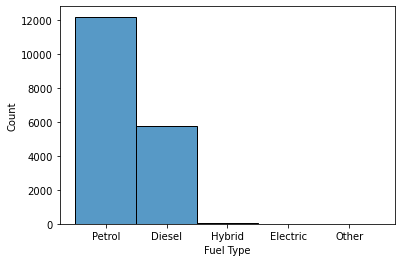

In [21]:
ax = sns.histplot(data = df, x = 'fuelType')
ax.set(xlabel = 'Fuel Type')

[Text(0.5, 0, 'Fuel Type')]

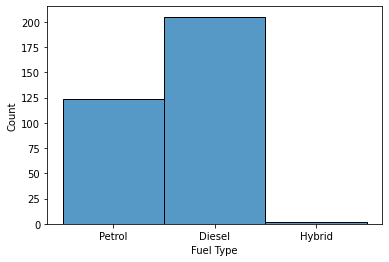

In [22]:
ax2 = sns.histplot(data = x, x = 'fuelType')
ax2.set(xlabel = 'Fuel Type')

We can create a scatterplot of fuel type versus mileage to see that, even though diesel engines only account for 32% of the dataset, they are the dominant fuel type of high-mileage vehicles.

[Text(0.5, 0, 'Fuel Type'), Text(0, 0.5, 'Mileage')]

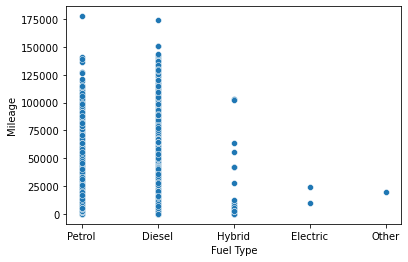

In [23]:
ax4 = sns.scatterplot(data = df, x = 'fuelType', y = 'mileage')
ax4.set(xlabel = 'Fuel Type', ylabel = 'Mileage')

We can thus assume that diesel-powered vehicles possess more longevity than petrol-powered vehicles, at least when it comes to engine durability.

Let's now determine if there's a relationship between engine size and mileage, specifically whether a certain range of engine size leads to higher-mileage vehicles. We can do this with a scatterplot.

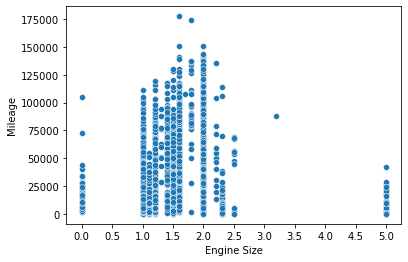

In [24]:
ax5 = sns.scatterplot(data = df, x = 'engineSize', y = 'mileage')
ax5.set(xlabel = 'Engine Size', ylabel = 'Mileage')
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

Let's also create a frequency histogram to simultaneously see which engine sizes are most prevalent in the dataset.

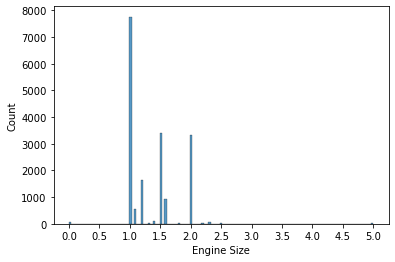

In [25]:
ax6 = sns.histplot(data = df, x = 'engineSize')
ax6.set(xlabel = 'Engine Size', ylabel = 'Count')
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

Interestingly, 1.0-liter engines are by far the most common engines within the dataset, comprising about 7,800 out of the 17,966 vehicles in the dataset. However, from the scatterplot, we can see that the highest-mileage vehicles in the dataset have engines that range from about 1.5 to 2.0 liters in displacement. Let's create a similar frequency histogram, this time with the high-mileage subset only. 

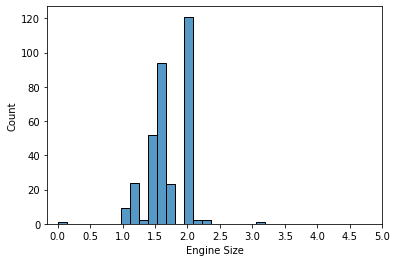

In [26]:
ax7 = sns.histplot(data = x, x = 'engineSize')
ax7.set(xlabel = 'Engine Size', ylabel = 'Count')
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

This plot further supports our claim. Although 1.0-liter engines make up over 40% of the total dataset, very few of them appear in our high-mileage subset (about 10 out of 331, or 3% of the subset). Furthermore, the majority of the high-mileage subset comprises of engines that are between 1.5 and 2.0 liters in displacement. 

From this analysis, we can reasonably make two conclusions. One of them is that Ford's diesel engines are more likely to last over 81,500 miles (our cutoff for high-mileage cars) than petrol engines. The second is that Ford engines with a displacement of between 1.5 and 2.0 liters are more likely to last more than 81,500 miles than other engine sizes.